In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


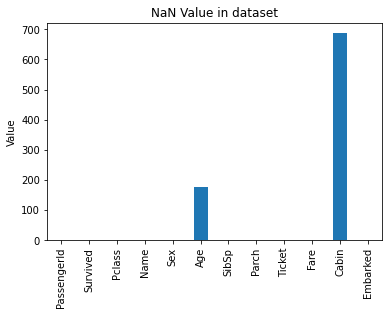

In [3]:
df.info()
null_value = df.isnull().sum()
null_value.plot(kind='bar', title='NaN Value in dataset', ylabel='Value')
plt.show()

In [4]:
df.drop(['PassengerId',
        'Name',
        'Cabin',
        'Ticket',
        'SibSp',
        'Parch'
        ], axis=1, inplace=True)

In [5]:
df = df.dropna()
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
885,0,3,female,39.0,29.1250,Q
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
889,1,1,male,26.0,30.0000,C


Converting And Normalizang Data (EDA)

In [6]:
df_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df.drop(['Embarked'], axis=1, inplace=True)
df_Pc = pd.get_dummies(df['Pclass'], prefix='PClass')
df.drop(['Pclass'], axis=1, inplace=True)
df['Sex'] = df['Sex'].map({'male':0,'female':1})
df['Age'] = df['Age'].div(df['Age'].max())
df['Fare'] = np.log10(df['Fare']+1)

In [7]:
new_df = pd.concat([df, df_dummies, df_Pc], axis=1)
new_df

,Survived,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,PClass_1,PClass_2,PClass_3
0,0,0,0.2750,0.916454,0,0,1,0,0,1
1,1,1,0.4750,1.859038,1,0,0,1,0,0
2,1,1,0.3250,0.950608,0,0,1,0,0,1
3,1,1,0.4375,1.733197,0,0,1,1,0,0
4,0,0,0.4375,0.956649,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,1,0.4875,1.478927,0,1,0,0,0,1
886,0,0,0.3375,1.146128,0,0,1,0,1,0
887,1,1,0.2375,1.491362,0,0,1,1,0,0
889,1,0,0.3250,1.491362,1,0,0,1,0,0


In [8]:
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.model_selection import train_test_split

In [9]:
y = df['Survived']
new_df.drop('Survived', inplace=True, axis=1)
X_train,X_test,y_train,y_test = train_test_split(new_df,y,random_state=72,test_size=0.3)

In [10]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [11]:
new_df

,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,PClass_1,PClass_2,PClass_3
0,0,0.2750,0.916454,0,0,1,0,0,1
1,1,0.4750,1.859038,1,0,0,1,0,0
2,1,0.3250,0.950608,0,0,1,0,0,1
3,1,0.4375,1.733197,0,0,1,1,0,0
4,0,0.4375,0.956649,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
885,1,0.4875,1.478927,0,1,0,0,0,1
886,0,0.3375,1.146128,0,0,1,0,1,0
887,1,0.2375,1.491362,0,0,1,1,0,0
889,0,0.3250,1.491362,1,0,0,1,0,0


In [12]:
XGBC = XGBRFClassifier(random_state=24)
XGBC.fit(new_df,y)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
                grow_policy='depthwise', importance_type=None,
                interaction_constraints='', max_bin=256, max_cat_threshold=64,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=0,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=24, reg_alpha=0, ...)

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

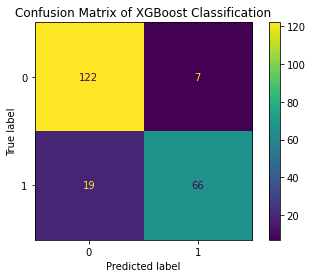

In [14]:
y_pred_XGBC = XGBC.predict(X_test)

conf = confusion_matrix(y_pred=y_pred_XGBC,y_true=y_test)
disp = ConfusionMatrixDisplay(conf)
disp.plot()

plt.title("Confusion Matrix of XGBoost Classification")
plt.show()

In [15]:
print(int(round(XGBC.score(X_test,y_test),2)*100))

88


In [30]:
test_data = pd.read_csv("test.csv")
pass_id = test_data['PassengerId']

In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [32]:
test_df = test_data.drop(['PassengerId',
        'Name',
        'Cabin',
        'Ticket',
        'SibSp',
        'Parch'
        ], axis=1, inplace=True)

In [33]:
test_data_dummies = pd.get_dummies(test_data['Embarked'], prefix='Embarked')
test_data.drop(['Embarked'], axis=1, inplace=True)
test_data_Pc = pd.get_dummies(test_data['Pclass'], prefix='PClass')
test_data.drop(['Pclass'], axis=1, inplace=True)

In [34]:
test_data['Sex'] = test_data['Sex'].map({'male':0,'female':1})
test_data['Age'] = test_data['Age'].div(80)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data['Fare'] = np.log10(df['Fare']+1)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [35]:
test_df = pd.concat([test_data, test_data_dummies, test_data_Pc], axis=1)
test_df

,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,PClass_1,PClass_2,PClass_3
0,0,0.431250,0.282498,0,1,0,0,0,1
1,1,0.587500,0.456220,0,0,1,0,0,1
2,0,0.775000,0.290170,0,1,0,0,1,0
3,0,0.337500,0.436671,0,0,1,0,0,1
4,1,0.275000,0.291513,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
413,0,0.378407,0.356838,0,0,1,0,0,1
414,1,0.487500,0.290170,1,0,0,1,0,0
415,0,0.481250,0.356838,0,0,1,0,0,1
416,0,0.378407,0.402269,0,0,1,0,0,1


In [36]:
predictions = XGBC.predict(test_df)
output = pd.DataFrame({'PassengerId': pass_id, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
